In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


  # Finite Differences for the Poisson Problem

  TODO: Write intro

  ## Packages
  - `IPython.display`: jupyter usage
  - `numpy`: numeric calculations
  - `matplotlib`: plotting
  - `math`: for Python's mathematics functions
  - `time`: for timings

In [2]:
# Packages
from IPython.display import display
import numpy as np
import scipy as sp
import scipy.sparse
import scipy.linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Finite Differences
TODO: Explain 

In [3]:
def evalBot(bot, xVals):
    return [bot(xVals[i]) for i in range(len(xVals))]
def evalRight(right, yVals):
    return [right(yVals[i]) for i in range(len(yVals))]
def evalTop(top, xVals):
    return [top(xVals[i]) for i in range(len(xVals))]
def evalLeft(left, yVals):
    return [left(yVals[i]) for i in range(len(yVals))]
def evalSource(source, xVals, yVals):
    return np.array([[source(xVals[i],yVals[j]) for j in range(len(yVals))] for i in range(len(xVals))]).reshape((N-2)**2)

def setupSystemMatrix(N):
    dxx = sp.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N-2, N-2)).toarray()
    dyy = sp.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N-2, N-2)).toarray()
    Ix = np.identity(N-2)
    Iy = np.identity(N-2)
    return - (np.kron(dyy,Ix) + np.kron(Iy,dxx)) # tensor structure: dyy ⊗ Ix + Iy ⊗ dxx

def setupRHSVector(source,bot,right,top,left):
    b = np.zeros((N-2)**2)
    b += evalSource(source, xVals, yVals)
    b[:(N-2)] += evalBot(bot, xVals)
    b[(N-3):(N-2)*(N-2):(N-2)] += evalRight(right, yVals)
    b[(N-3)*(N-2):] += evalTop(top, xVals)
    b[0:(N-3)*(N-2)+1:(N-2)] += evalLeft(left, yVals)
    return b

def plotSolutionWithBCs(u):
    u = u.reshape((N-2, N-2))
    uExt = np.zeros([N,N])
    uExt[1:N-1,1:N-1] = u.reshape((N-2, N-2))
    uExt[0,1:N-1] = evalBot(bot, xVals)
    uExt[1:N-1,0] = evalLeft(left, xVals)
    uExt[N-1,1:N-1] = evalTop(top, xVals)
    uExt[1:N-1,N-1] = evalRight(right, xVals)

    # Remove undetermined edges
    uExt[0,0] = 0
    uExt[N-1,0] = 0
    uExt[N-1,N-1] = 0
    uExt[0,N-1] = 0

    xValsExt = [0,*xVals,L]
    yValsExt = [0,*yVals,L]
    X, Y = np.meshgrid(xValsExt, yValsExt)
    Z = uExt

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap="viridis")
    plt.title("Solution to Poisson Problem")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.imshow(Z, cmap='hot', interpolation='nearest')
    plt.title("Solution to Poisson Problem")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Simultaneous Source Term and Boundary Conditions
TODO

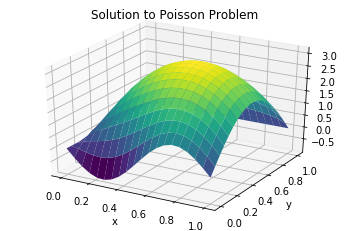

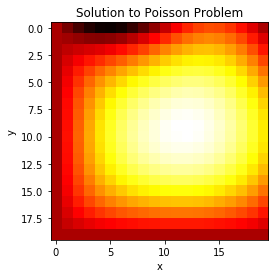

In [4]:
L=1
N = 20
d = L/(N-1)
xVals = [i*d for i in range(1,N-1)]
yVals = [i*d for i in range(1,N-1)]

def source(x,y):
    return 0.1
def bot(x):
    return -1*np.sin(2*np.pi*x)
def right(y):
    return 2*np.sin(np.pi*y)
def top(x):
    return 0
def left(y):
    return 0

A = setupSystemMatrix(N)
b = setupRHSVector(source,bot,right,top,left)

u = np.linalg.solve(A, b)

plotSolutionWithBCs(u)

## Converge Rate
TODO

4 0.25 0.09695022100214927
8 0.125 0.02378592683102282
16 0.0625 0.005560967440259246
32 0.03125 0.001329112275632982
64 0.015625 0.00032340602254188333


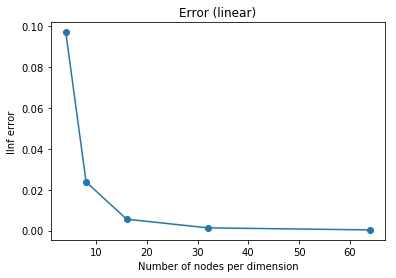

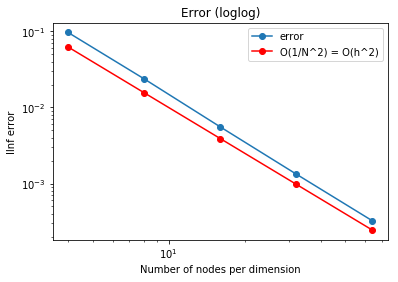

In [5]:
NList = [4,8,16,32,64]
errors = []
for N in NList:
    L=1
    d = L/(N-1)
    xVals = [i*d for i in range(1,N-1)]
    yVals = [i*d for i in range(1,N-1)]

    def source(x,y):
        return 0
    def bot(x):
        return np.sin(2*np.pi*x)
    def right(y):
        return 0
    def top(x):
        return np.sin(2*np.pi*x)
    def left(y):
        return 0

    A = setupSystemMatrix(N)
    b = setupRHSVector(source,bot,right,top,left)

    u = np.linalg.solve(A, b)

    def uReal(x,y):
        return (np.cosh(2*np.pi*y) + ((1-np.cosh(2*np.pi))/np.sinh(2*np.pi))*np.sinh(2*np.pi*y) ) * np.sin(2*np.pi*x)

    X, Y = np.meshgrid(xVals, yVals)
    uReal = uReal(X,Y).reshape((N-2)**2)
    error = uReal - u
    lInf_error = np.max(error)
    print(N, 1/N, lInf_error)
    errors.append(lInf_error)

plt.plot(NList, errors, marker="o")
plt.title("Error (linear)")
plt.xlabel("Number of nodes per dimension")
plt.ylabel("lInf error")
plt.show()

plt.loglog(NList, errors, marker="o")
plt.loglog(NList, 1/(np.array(NList)**2), "r", marker="o")
plt.title("Error (loglog)")
plt.xlabel("Number of nodes per dimension")
plt.ylabel("lInf error")
plt.legend(["error", "O(1/N^2) = O(h^2)"])
plt.show()